In [ ]:
from IPython.display import Image, display

# Managing the Dutch railway network in order to get trains to their destination safely and on time using Deep Learning 
## Introduction
[](https://miro.medium.com/max/175/1*SkdlYzpkGG-I-c2Tdjh6hw.png)

## The Problem : Derailment of a train 

In [ ]:
display(Image(filename='/kaggle/input/cats-datasets/Probleme-de-draillement.png'))
display(Image(filename='/kaggle/input/cats-datasets/probleme_de_draillement2.jpg'))

## Causes

In [ ]:
display(Image(filename='/kaggle/input/cats-datasets/Causes.png'))

> # the cause that we will be working on


In [ ]:
display(Image(filename='/kaggle/input/cats-datasets/cause11.png'))
display(Image(filename='/kaggle/input/cats-datasets/cause12.jpg', height=400, width=400))

## Solutions given to handle with that cause
![](https://rail.nridigital.com/rail/future_rail_yearbook_2018/centre_for_advanced_transport_engineering_and_research/200839/SRT_and_Train.960_0_1.jpg)
![](https://www.rtands.com/wp-content/uploads/2019/01/RFD-1-Sperry_ATS-1-755x402.jpg)

System : take time and make the rail busy


> # Our Solution : proposed by [ProRail](https://www.prorail.nl) which is a Dutsh railway

> >  ## Taking images  of rail with camera and store them in a [dataset](https://www.kaggle.com/oscarvanhees/insulation-joint-training-set-prorail). 

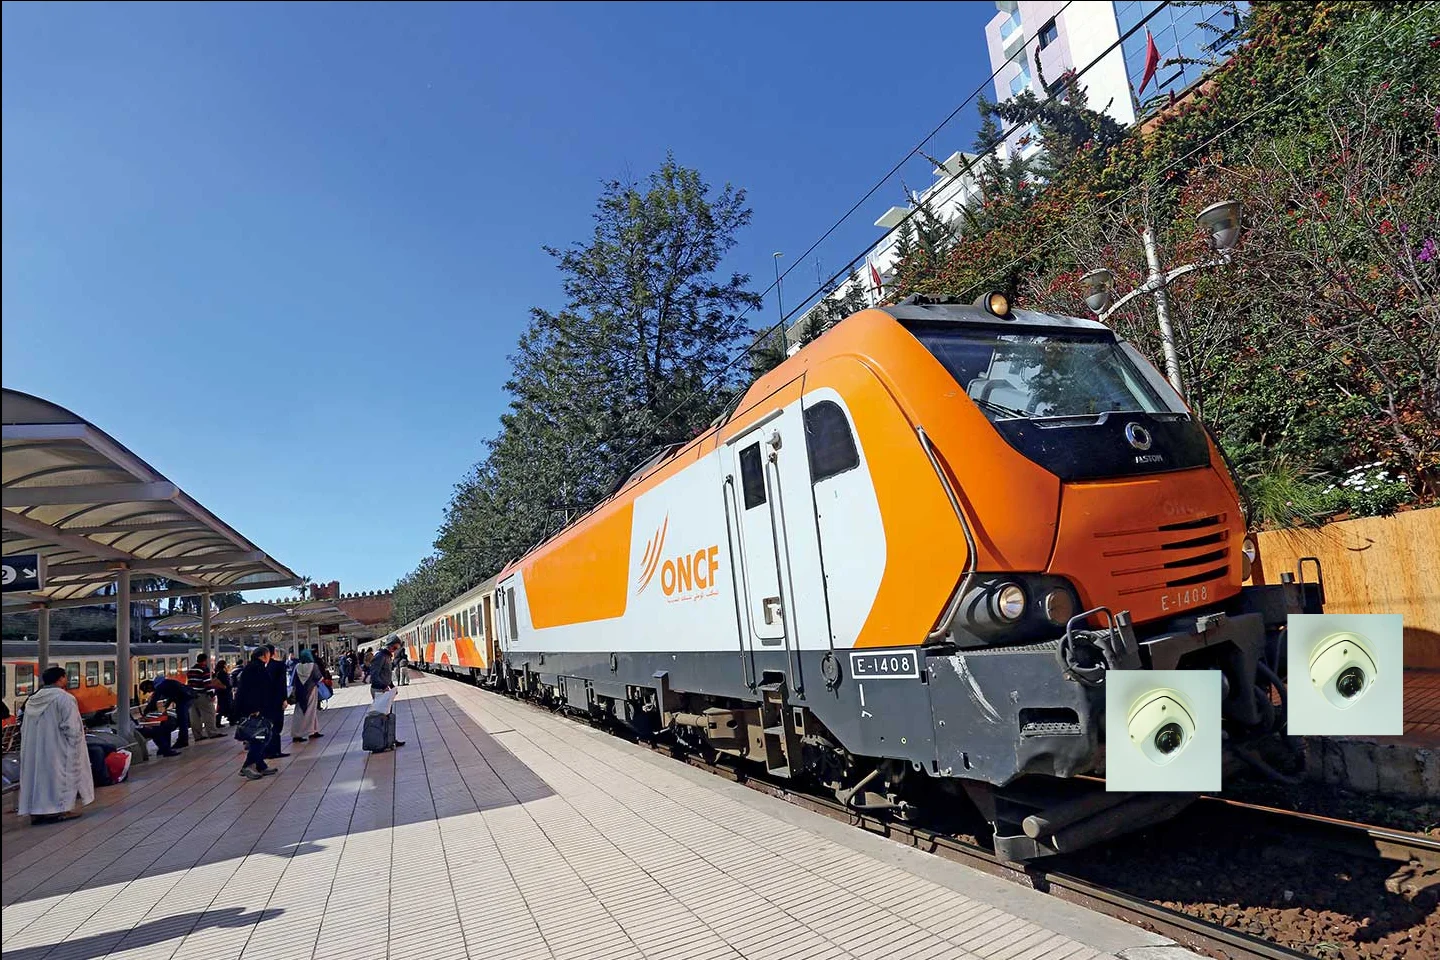


> >  ## Classify this images into :  
    *     Images with a problem in the rail  
    *     Images without a problem in the rail  
> >  ### Using :      
    *     Supervised learning :  
![](https://www.researchgate.net/profile/Rory_Bunker/publication/319937079/figure/fig1/AS:542578279366656@1506372150206/Supervised-Learning-versus-Unsupervised-Learning-Mathworks-nd.png)    
    *     Deep learning :  
![](https://cdn-images-1.medium.com/freeze/max/1000/1*zUATaXMAmKof27rPyBRWsg.png?q=20)   
    *     Transfer learning : (Pre-trained models) 
![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/12/A-Gentle-Introduction-to-Transfer-Learning-with-Deep-Learning.jpg)    

[](https://miro.medium.com/max/1400/1*R-ItxBW2SWarITBKe7HZuA.gif)

 #### First Let’s import the needed libraries 
# Setup Libraries

### Keras or Tensorflow ?  
![](https://www.pyimagesearch.com/wp-content/uploads/2018/10/keras_vs_tensorflow_wrong_question.jpg)
* if you are a beginner in the ML field just like me go with keras because the Keras API is modular, Pythonic, and super easy to use. Just to know the process in ML and DL problems. Also in our project we gonna work with pretrained models so we have already the architecture of these models, we dont have to build models from scratch and even if we want to, we are not going to build Some complex Architecures or costum layers

* And then we can go with Tensorflow to Know much more thing about Machine Learning and deep learning or if you need a custom layer implementation, a more complex loss function, etc., you can drop down into it, and have the code integrate with your Keras model automatically.

### Keras has become the gold standard for building ANNs in the applied space. The guy that created it, François Chollet, was a Google intern and usability fanatic, [understood that the easier you make the front end, the more developers will use it](https://www.youtube.com/watch?v=44tFKZhPyP0)… and they did and are in droves with this delightful API. [Resource](https://www.quora.com/What-are-the-major-differences-between-TensorFlow-Keras-and-PyTorch)

In [ ]:
import os

import tensorflow as tf #You need to learn the syntax of using various Tensorflow function./Research/Not very easy to use
import keras #Keras is easy to use if you know the Python language.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers
from keras.models import Sequential
from sklearn.utils import class_weight
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import resnet50
from keras.applications import resnet

# # Here is the pipeline of this DL project

In [ ]:
display(Image(filename='/kaggle/input/cats-datasets/Process.png'))

# Let's Start
[](https://content.thriveglobal.com/wp-content/uploads/2019/02/Start-Business-Junk-Removal.jpg)

# ----------------------------------------------Data Handling--------------------------------------------------------

> # Data Collection

* Like we have say that the data was colected buy a camera and stored in file named images and the label of this images is in the csv file named labels.csv  : Camma Separetad Values file 

* the dataset is in kaggle in the name [Image data of insulation joints - ProRail ](https://www.kaggle.com/oscarvanhees/insulation-joint-training-set-prorail) 

* We can add data to our Notebook just by doing the steps below :  

In [ ]:
display(Image(filename='/kaggle/input/cats-datasets/Add_data.png'))

> # Data Acquisition

* Read the data frame from the csv file using the "read_csv()" function located in pandas labrary 

In [ ]:
path = '/kaggle/input/insulation-joint-training-set-prorail/trainset_insulation_joint/labels.csv'
df = pd.read_csv(path, sep=';')

ROOT_DATA = '/kaggle/input/insulation-joint-training-set-prorail/trainset_insulation_joint/'
df['filepath'] = df.ID.apply(lambda x: os.path.join(ROOT_DATA, 'images/', f"{x}.jpg"))

#df.ix[0]
#df.head()

> # Data Undertanding

* Explore Data

In [ ]:
df
#df_labeled_n = df[df['label'] == 'n']
#df_labeled_n

In [ ]:
listOfImageNames = []
for dirname, _, filenames in os.walk('/kaggle/input/insulation-joint-training-set-prorail/trainset_insulation_joint/images/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        listOfImageNames.append(os.path.join(dirname, filename))

In [ ]:
i=26538
j=28200
for k in range(i, j, 100):
    print(df[df['label'].index==k])
    display(Image(filename=listOfImageNames[k], width=300, height=300))

>  An image where there is no problem in the rail labled p 

In [ ]:
indice_image_N=26574
print(df[df['label'].index==indice_image_N])
display(Image(filename=listOfImageNames[indice_image_N], width=700, height=700))

> An image where there is a problem in the rail labled n 

In [ ]:
indice_image_N=26536
print(df[df['label'].index==indice_image_N])
display(Image(filename=listOfImageNames[indice_image_N], width=700, height=700))

* Show the distribution of image classes {0 : 1}

In [ ]:
target_count = df['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Training data)')

# ----------------------------------------------Data Preparation-----------------------------------------------------

> # Data spliting : Split data into Train Data, Validation Data and Test Data

* * ## Methode 1 

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=42, shuffle = True)

df_train, df_val = train_test_split(df_train, train_size=0.7, test_size=0.3, random_state=42, shuffle = True)

#The train_test_split function can either split the dataset into set for training and set of testing
#or it can split the dataset into input_train_set=X_train and output_train_set=y_train 

In [ ]:
#X
X = df['filepath'].values

#y
df['label'] = df.label.apply(lambda x: 1 if x=='p' else 0)
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

 #### Show the distribution of data in every set

*  Distribution of Training data


In [ ]:
target_count = df_train['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Training data)')

*  Distribution of Validation data

In [ ]:
target_count = df_val['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Validation data)')

*  Distribution of Testing data

In [ ]:
target_count = df_test['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Test data)')

* * ## Methode 2 : Cross Validation
![](https://www.researchgate.net/profile/Rory_Bunker/publication/319937079/figure/fig4/AS:542578277875712@1506372150538/Diagrammatic-representation-of-10-fold-Cross-Validation-Raschka-nd.png)

<a class="anchor" id="Imb-header"></a>
> # Data Balancing -> Training dataset

* ## Using Under-Sampling

In [ ]:
minority_class_len = 818
majority_class_indices = df_train[df_train['label'] == 'n'].index

#Chose from the Majority class which is class 0, 818 random images 
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
minority_class_indices = df_train[df_train['label'] == 'p'].index

#Concatenate the class 1 with the new 'class 0=random_class_indices'
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
df_train = df_train.loc[under_sample_indices]

#Show the distribution of the trainig set after under sampling
target_count = df_train['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Training data)')

In [ ]:
#in dont know if the df_train size is 4908 or 818*2=1636 
#it seems like df_train size is not the df train lenght
df_train.size
#lenght * 3(RGB) = size

* ## Using Over-sampling 

* * ### Random oversampling

In [ ]:
target_count = df_train['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Training data)')

* * ### SMOTE: Synthetic Minority Oversampling Technique

In [ ]:
#https://arxiv.org/abs/1106.1813
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
under_sample_indices = np.concatenate([X_os, y_os])
df_train = df_train.loc[under_sample_indices]

In [ ]:
target_count = df_train['label'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Training data)')

* ## Combination of SMOTE and Under-Sampling

In [ ]:
print('Mazal makayn walou')

* ## Using class weight technique


In [ ]:
class_weights = class_weight.compute_class_weight('balanced', np.array(['n', 'p']), list(df_train['label']))
class_weight_dict = dict(enumerate(class_weights/10))
class_weight_dict

> # Data Preprocessing

In [ ]:
path = '/kaggle/input/cats-datasets/Data_augmentation.png'
display(Image(filename=path))

path='/kaggle/input/cats-datasets/When_you_have_BigData.jpeg'
display(Image(filename=path, height=500, width=500))

In [ ]:
#Because the model cannot train on the whole data set in one shot 
#we gonna split the training and validation data into a number of batches 
#every batch load 32 Images 
Input_shape = (224, 224, 3)
Generator = ImageDataGenerator(preprocessing_function = resnet.preprocess_input)

train_generator = Generator.flow_from_dataframe(df_train, 
                                                   x_col='filepath', y_col='label',
                                                   target_size=Input_shape[:2],
                                                    classes=['n', 'p'],
                                                   batch_size=32,
                                                    shuffle = True,
                                                   class_mode='categorical')

val_generator = Generator.flow_from_dataframe(df_val, 
                                                   x_col='filepath', y_col='label',
                                                   target_size=Input_shape[:2],
                                                    classes=['n', 'p'],
                                                   batch_size=32,
                                                    shuffle = True,
                                                   class_mode='categorical')
#if you work with 'path'(your have youre data in laptop ) use flow_from_directory insted and df_train_path

# -------------------------------------------Apply Transfer learning-----------------------------------------------


**I will use the Pretrained model : The Resnet50 Model**

> # The process 
[](https://www.mathworks.com/discovery/transfer-learning/_jcr_content/mainParsys/image_226673988.adapt.full.high.jpg/1576731630748.jpg)
![](https://miro.medium.com/max/1400/1*iPZ_xeE0hmmtAyxKVD2Q7Q.png)

> # Load the pretrained model : Resnet50 model

In [ ]:
Input_shape = (224,224,3)
resnet50_model = keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=Input_shape)
#resnet50_model.summary()
#, pooling='max'
#,pooling='avg'


In [ ]:
keras.utils.plot_model(model, "Resnet50_model.png",show_shapes=True)

<a class="anchor" id="TL-header"></a>
> # Fine tuning it

In [ ]:
path = '/kaggle/input/cats-datasets/When_to_use_transfer_learning.png'
display(Image(filename=path))

In [ ]:
x = resnet50_model.output
x = layers.GlobalAveragePooling2D()(x)
preds = layers.Dense(2, activation='softmax', name = 'Output')(x) #final layer with softmax activation
model = keras.Model(inputs = resnet50_model.input, outputs = preds)

#freeze some layers and unfreez
for layer in model.layers[70:]:
    layer.trainable = False
for layer in model.layers[:-100]:
    layer.trainable = True
    
model.summary()

Show the freezed and unfreezed layers

In [ ]:

for layer in model.layers:
    print(layer.name, "  " , layer.trainable)

In [ ]:
len(model.layers)

# -----------------------------------------------Train the Networks-------------------------------------------------

>  # Compile the model

* Chose the optimizer

* Chose the loss function

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

> # Train the model

In [ ]:
History = model.fit_generator(train_generator, 
                                epochs=10,
                                verbose=1,
                                validation_data = val_generator)
                                #class_weight = class_weight_dict)

In [ ]:
history = History.history
print('Validation accuracy: {acc}, loss: {loss}'.format(acc=history['val_accuracy'][-1], loss=history['val_loss'][-1]))


#  Training and validation Metrics plot

In [ ]:
acc = History.history['accuracy']
acc_val = History.history['val_accuracy']
loss = History.history['loss']
val_loss =  History.history['val_loss']
#-------
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pretrained ResNet50 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
n=10
epoch_list = np.array(range(0,n))


ax1.plot(epoch_list, acc, label='Train Accuracy')
ax1.plot(epoch_list, acc_val, label='Validation Accuracy')
ax1.set_xticks(np.arange(0, n, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")


ax2.plot(epoch_list, loss, label='Train Loss')
ax2.plot(epoch_list, val_loss,label='Validation Loss')
ax2.set_xticks(np.arange(0, n, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Just if we make the number of epoch higher we get a better plot

# ------------------------------------------Test and evaluate the model-----------------------------------------

> # Generate Predictions on the test_set

More Realistic model we gonna train it on imblanced dataset

In [ ]:
target_count = df_test['label'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Test data)')

In [ ]:
test_generator=Generator.flow_from_dataframe(df_test,
                                                target_size=Input_shape[:2],
                                                x_col="filepath",
                                                y_col=None,
                                                batch_size=32,
                                                shuffle=False,
                                                class_mode=None)

In [ ]:
y_prob = model.predict(x=test_generator, verbose=1) 
#for i in y_prob:
#    print(i)

In [ ]:
y_classes = y_prob.argmax(axis=-1)
#for i in y_classes:
#    print(i)

In [ ]:
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]

* show the actual labels

In [ ]:
df_test['label']

In [ ]:
df_test['label'] = df.label.apply(lambda x: 1 if x=='p' else 0)
y_test = df_test['label'].values

* Show the predicted labels

In [ ]:
y_classes

In [ ]:
len(y_classes) == len(df_test)

> # Confusion matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred=y_classes, y_true=df_test['label'].values)
cm = np.array(cm)
#print(cm)
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.figure(figsize=(20,20))
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted ')
    
    plt.show()

In [ ]:
cm_plot_labels = ['there is no problem','there is a problem']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

> # Evaluation metrics 

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
#calculate the accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Prediction_Accuracy=",accuracy,"%")
#calculate sensitivity = TPR
sensitivity = TP/(TP+FN)
print("Sensitivity=",sensitivity,"%")
#calculate specificity = 1 - FPR
specificity = TN/(TN+FP)
print("Specificity=",specificity,"%")
#calculate precision
precision = TP/(TP+FP)
print("Precision=",precision,"%")

> # ROC Curve

ROC / AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#Calculate AUC
dense_auc = roc_auc_score(y_test, y_classes)
print('ResNet50 (chance) Prediction: AUROC = %.3f' % (dense_auc))
#Calculate ROC
r_fpr, r_tpr, _ = roc_curve(y_test, y_classes)

#Plot The ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='ResNet50 prediction (AUROC = %0.3f)' % dense_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Averaging strategies

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = df_test['label'].values # ground truth labels
y_probas = y_prob# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

# Improve the performance of the Model 

In [ ]:
del model

In [ ]:
test_generator.reset()

In [ ]:
#clean up
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

[Improve the model by fine_tuning it](#TL-header).  

[Improve the model by handling with the problem of imblanced data set](#Imb-header).  